In [2]:
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew

%config InlineBackend.figure_format = 'retina'

# General fig dim and colors
fs = (20,10)
pal = 'CMRmap_r'

In [20]:
df = pd.read_csv('C:/Users/gptcs/Desktop/iris/Iris.csv')
if 'Id' in df.columns:
    df.drop('Id',axis=1,inplace=True)
display( df )

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [22]:
display( pd.DataFrame(df.species.value_counts()) )

,species
Iris-virginica,50
Iris-setosa,50
Iris-versicolor,50


In [23]:
df.describe().T.iloc[0:, 1:].style.background_gradient(cmap=pal)

,mean,std,min,25%,50%,75%,max
sepal_length,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal_width,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
petal_length,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
petal_width,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


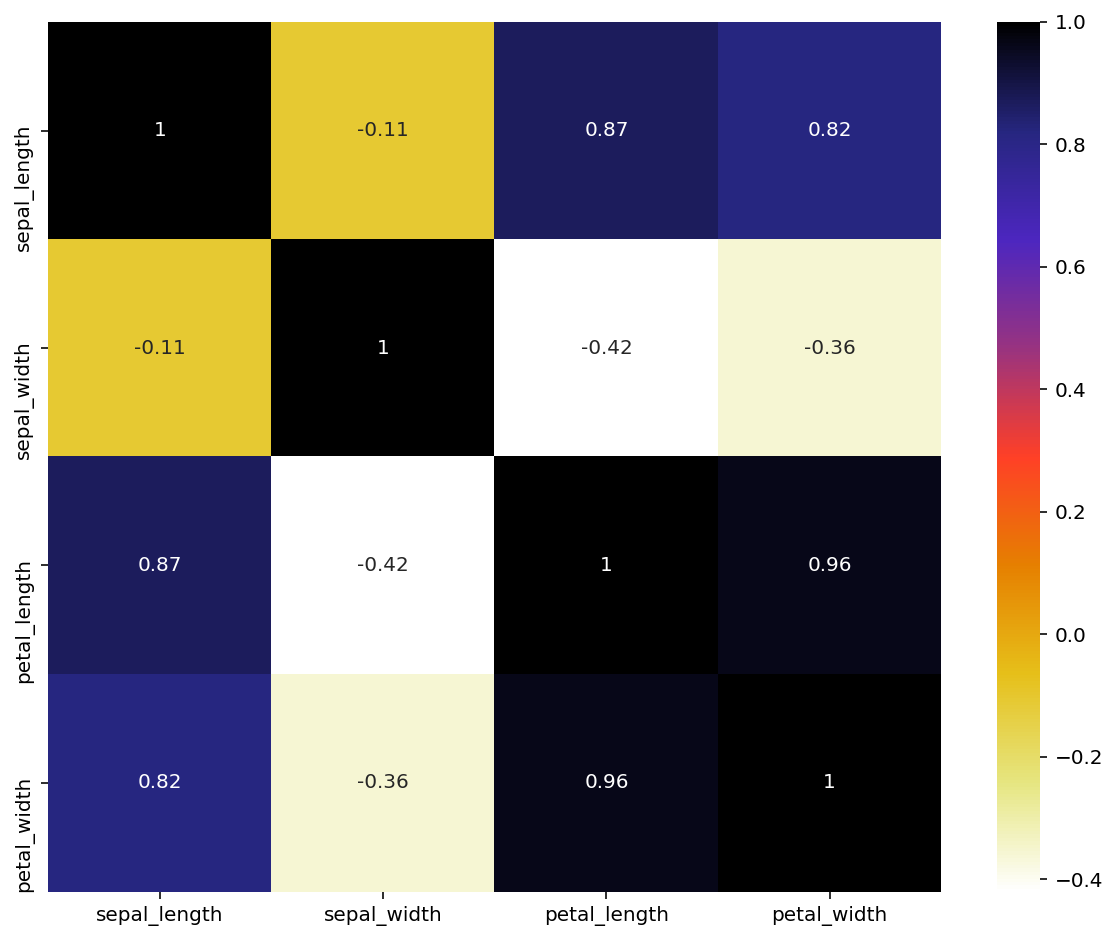

In [24]:
pl.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap=pal)
pl.show()

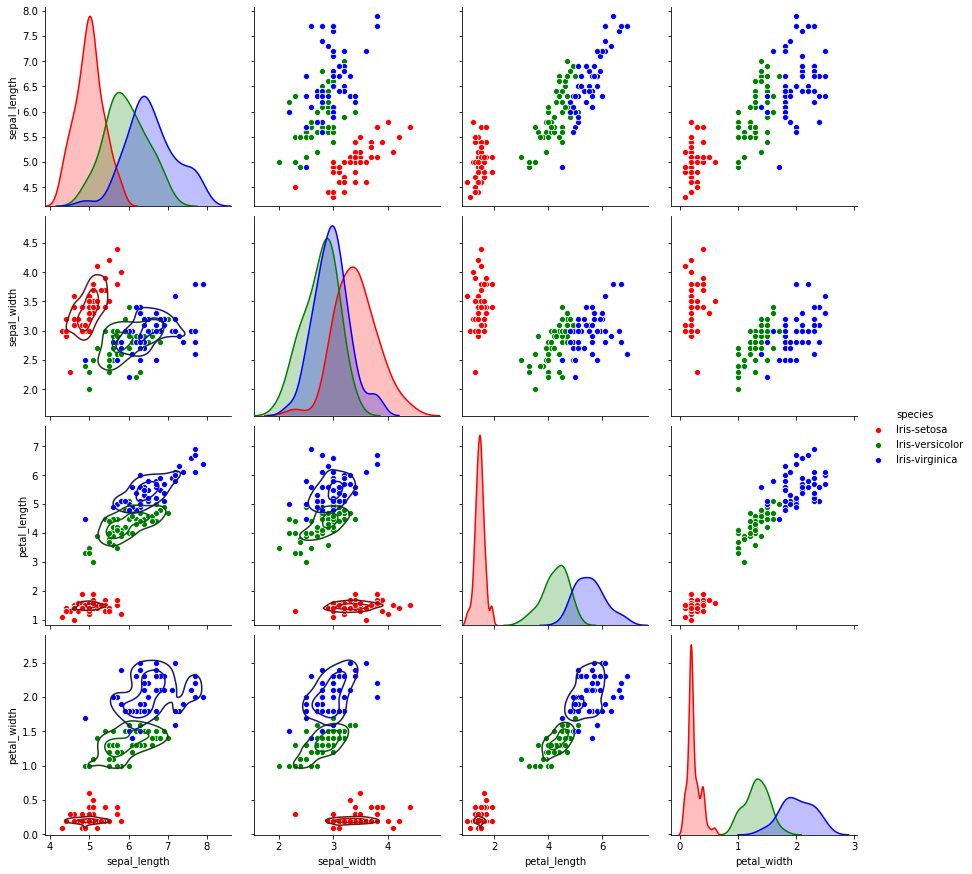

In [2]:
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
df = pd.read_csv('C:/Users/gptcs/Desktop/iris/Iris.csv')
pal=['red','green','blue']
sns.pairplot(df, hue='species', palette=pal, height=3).map_lower(sns.kdeplot, levels=2)
pl.show()

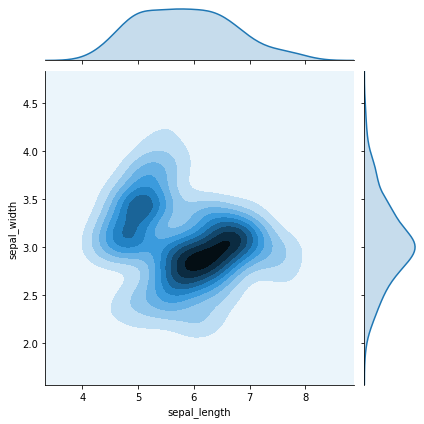

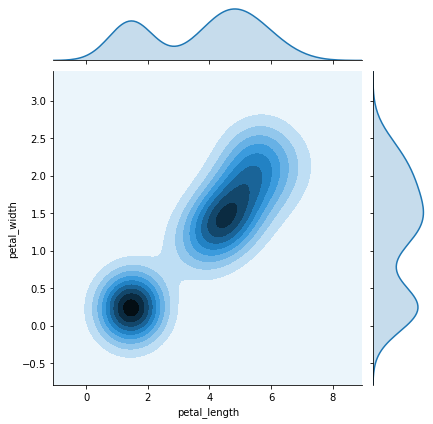

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.jointplot(x='sepal_length',
              y='sepal_width',
              kind="kde",
              fill=True,
              palette=pal,
              hue='Species',
              data=df)

sns.jointplot(x='petal_length',
              y='petal_width',
              kind="kde",
              fill=True,
              palette=pal,
              hue='Species',
              data=df)

pl.show()


In [ ]:
pip install dataprep


In [5]:
from dataprep.eda import create_report
create_report(df)

ModuleNotFoundError: No module named 'dataprep'

In [13]:
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
fig, axes = pl.subplots(2, 4, figsize=fs)
fs=(width,height)
pl.subplots()
# Violin Plots
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.violinplot(x='species', y=col, palette=pal, data=df, ax=ax)
    
# Strip Plots
for ax, col in zip(axes.flatten()[4:], df.columns[:-1]):
    sns.stripplot(x='species', y=col, palette=pal, data=df, ax=ax)
    
pl.tight_layout(pad=0, w_pad=1.5, h_pad=2)
pl.show()

NameError: name 'fs' is not defined

AttributeError: module 'seaborn' has no attribute 'histplot'

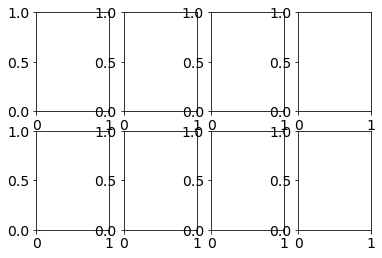

In [60]:

fig, axes = pl.subplots(2, 4, figsize=fs)

# Categorized Histograms
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.histplot(data=df, x=col, kde=True, bins=25, hue='species', palette=pal, ax=ax)

# Total Histograms
for ax, col in zip(axes.flatten()[4:], df.columns[:-1]):
    mu, sigma = norm.fit(df[col])
    sns.histplot(data=df, x=col, kde=True, bins=25, color='purple', ax=ax,
                 label=f'$\mu$ = {mu:.1f}\n$\sigma$ = {sigma:.1f}')
    ax.legend()
    
pl.tight_layout(pad=0, w_pad=0, h_pad=2)
pl.show()

In [4]:
from plotly.express import scatter_matrix
from plotly.express import parallel_categories
from plotly.express import scatter_3d

In [9]:
import pandas as pd
df = pd.read_csv('C:/Users/gptcs/Desktop/iris/Iris.csv')
scatter_matrix(df, dimensions=df.columns[:-1], color='species',
               color_discrete_sequence=['yellow', 'red', 'purple'])

In [10]:
parallel_categories(df)

In [11]:
scatter_3d(x='petal_length',
           y='petal_width',
           z='sepal_length',
           color='species',
           color_discrete_sequence=['yellow', 'red', 'purple'],
           data_frame=df).show()

In [13]:
scatter_3d(x='petal_length',
           y='petal_width',
           z='sepal_width',
           color='species',
           color_discrete_sequence=['yellow', 'red', 'purple'],
           data_frame=df).show()

In [14]:
from pandas.plotting import andrews_curves

In [15]:
from pandas.plotting import parallel_coordinates

In [16]:
from pandas.plotting import radviz

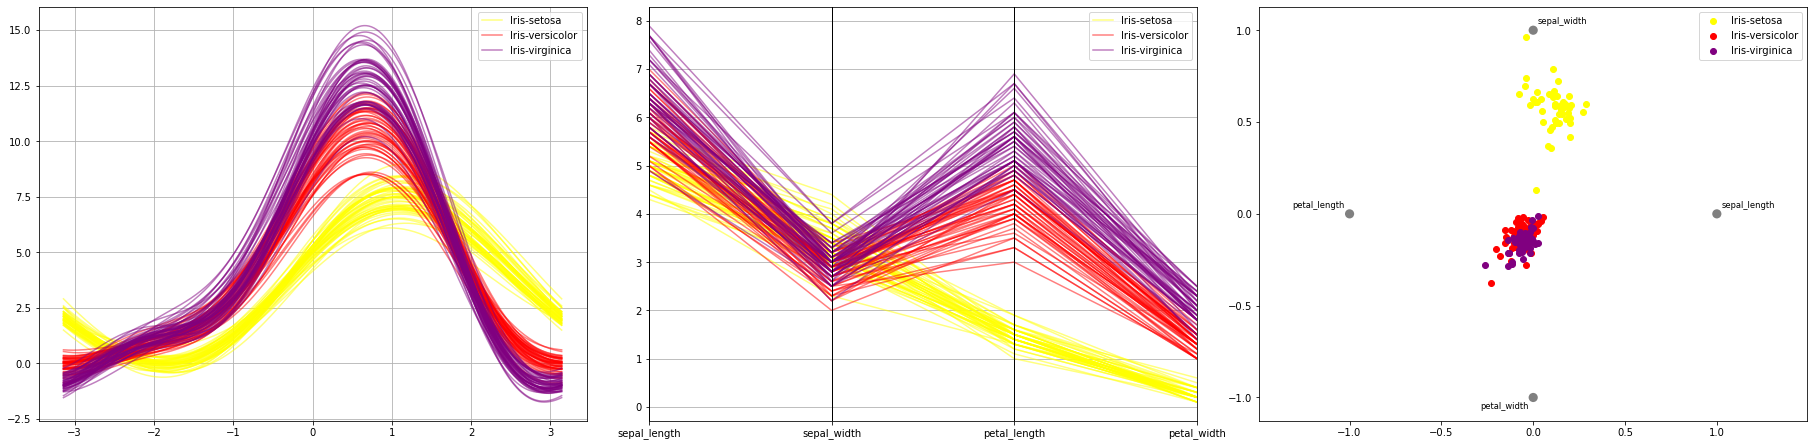

In [18]:
def AV_plots():
    """
    Special thanks to Anand Venkataraman
    """
    # Imports for plots
    from pandas.plotting import andrews_curves
    from pandas.plotting import parallel_coordinates
    from pandas.plotting import radviz

    # plotting
    fig, ax = pl.subplots(1, 3, figsize=(25,6))
    
    # Andrews Curves
    andrews_curves(frame=df, class_column="species",
                   color=['yellow','red','purple'],
                   alpha=0.5, ax=ax[0])
    # Parallel Coordinates
    parallel_coordinates(frame=df, class_column="species",
                         color=['yellow','red','purple'],
                         alpha=0.5, ax=ax[1])
    # Radviz
    radviz(frame=df, class_column="species",
           
           color=['yellow','red','purple'], ax=ax[2])
    pl.tight_layout(pad=0, w_pad=0.2, h_pad=0)
    pl.show()
    
AV_plots()

In [19]:
from sklearn.model_selection import train_test_split # 4.1

from sklearn.linear_model import LogisticRegression  # 4.2
from sklearn.tree import DecisionTreeClassifier      # 4.3
from sklearn.neighbors import KNeighborsClassifier   # 4.4
from sklearn.naive_bayes import GaussianNB           # 4.5
from sklearn import svm                              # 4.6
# Model analysis functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

col_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
ac_list = []
model_names = []

################################################
## Confusion Matrix Plot true vs pred values  ##
################################################
def CM(y_test, y_pred_test, col_names, model='model', fs=(8,6)):
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as pl
    pl.rcParams.update({'font.size': 14})
     # Forming confusion matrix
    c_matrix = confusion_matrix(y_test, y_pred_test)
    
    pl.figure(figsize=fs)
    sns.heatmap(c_matrix, annot=True, annot_kws={'size':15},
                fmt=".0f", cmap=pl.cm.Purples, linewidths=5)
    
    tick_marks = np.arange(len(col_names))
    pl.xticks(tick_marks + 0.5, col_names)
    pl.yticks(tick_marks + 0.5, col_names, rotation=0)
    pl.xlabel('Predicted label')
    pl.ylabel('True label')
    pl.title(f'Confusion Matrix for {model} Model')
    pl.show()

In [21]:
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, 
                                                    random_state=50)

print(f'Shapes | X - Train: {X_train.shape}\t | X - Test {X_test.shape}')
print(f'Shapes | Y - Train: {y_train.shape}\t | Y - Test {y_test.shape}')

Shapes | X - Train: (105, 4)	 | X - Test (45, 4)
Shapes | Y - Train: (105,)	 | Y - Test (45,)


In [22]:
display(X_train.head(),
        X_test.head())

,sepal_length,sepal_width,petal_length,petal_width
17,5.1,3.5,1.4,0.3
42,4.4,3.2,1.3,0.2
18,5.7,3.8,1.7,0.3
146,6.3,2.5,5.0,1.9
114,5.8,2.8,5.1,2.4


,sepal_length,sepal_width,petal_length,petal_width
88,5.6,3.0,4.1,1.3
72,6.3,2.5,4.9,1.5
20,5.4,3.4,1.7,0.2
16,5.4,3.9,1.3,0.4
147,6.5,3.0,5.2,2.0


In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_ss = sc.fit_transform(X_train)
X_test_ss = sc.transform(X_test)

In [24]:
display(pd.DataFrame(X_train_ss).head(),
        pd.DataFrame(X_test_ss).head())

,0,1,2,3
0,-0.894769,0.980450,-1.326228,-1.166693
1,-1.764684,0.280129,-1.383511,-1.298985
2,-0.149128,1.680772,-1.154381,-1.166693
3,0.596513,-1.353955,0.735945,0.949985
4,-0.024855,-0.653634,0.793227,1.611447


,0,1,2,3
0,-0.273402,-0.186752,0.220402,0.156231
1,0.596513,-1.353955,0.678662,0.420816
2,-0.521949,0.747010,-1.154381,-1.298985
3,-0.521949,1.914213,-1.383511,-1.034401
4,0.845060,-0.186752,0.850510,1.082278


In [25]:
print(f'{y_train.head()}\n\
      \n{y_test.head()}')

17        Iris-setosa
42        Iris-setosa
18        Iris-setosa
146    Iris-virginica
114    Iris-virginica
Name: species, dtype: object
      
88     Iris-versicolor
72     Iris-versicolor
20         Iris-setosa
16         Iris-setosa
147     Iris-virginica
Name: species, dtype: object


In [26]:
pd.DataFrame( y_test.value_counts() )

,species
Iris-versicolor,17
Iris-virginica,14
Iris-setosa,14


In [27]:
MR = LogisticRegression(multi_class='multinomial', random_state=0)

# Fitting Model
MR.fit(X_train, y_train)

# Getting Predictions
MR_pred = MR.predict(X_test)

# fitting model & getting predictions 
# MR.fit(X_train_ss, y_train)
# MR_pred = MR.predict(X_test_ss)

In [28]:
MR_ac = accuracy_score(y_test, MR_pred)
ac_list.append(MR_ac)
model_names.append('MLR')

print(f'Accuracy Score: {MR_ac:.3f}\n')

Accuracy Score: 0.978



In [29]:
MR_pred_df = pd.DataFrame(pd.Series(MR_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), MR_pred_df], axis=1)

,species,Test Outcome
Iris-versicolor,17,16
Iris-virginica,14,15
Iris-setosa,14,14


In [30]:
print(f'Intercept: \n {MR.intercept_}\n')
print(f'Coefficients: \n {MR.coef_}')

Intercept: 
 [  9.56781812   1.79395653 -11.36177465]

Coefficients: 
 [[-0.49531028  0.82559904 -2.25610462 -0.91242549]
 [ 0.508081   -0.32622264 -0.16167049 -0.89205679]
 [-0.01277073 -0.4993764   2.41777511  1.80448228]]


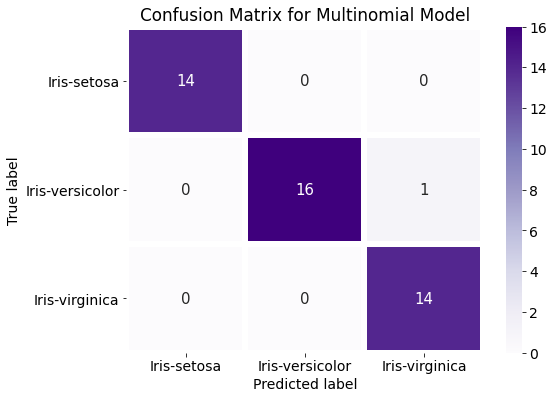

In [33]:
import seaborn as sns
import numpy as np
CM(y_test, MR_pred, col_names=col_names, model='Multinomial')

In [34]:
print(classification_report(y_test, MR_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [35]:
DT = DecisionTreeClassifier()

# Fitting Model
DT.fit(X_train, y_train)

# Getting Predictions
DT_pred = DT.predict(X_test)

In [36]:
DT_ac = accuracy_score(y_test, DT_pred)
ac_list.append(DT_ac)
model_names.append('DT')

print(f'Accuracy Score: {DT_ac:.3f}\n')

Accuracy Score: 0.956



In [37]:
DT_pred_df = pd.DataFrame(pd.Series(DT_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), DT_pred_df], axis=1)

,species,Test Outcome
Iris-versicolor,17,17
Iris-virginica,14,14
Iris-setosa,14,14


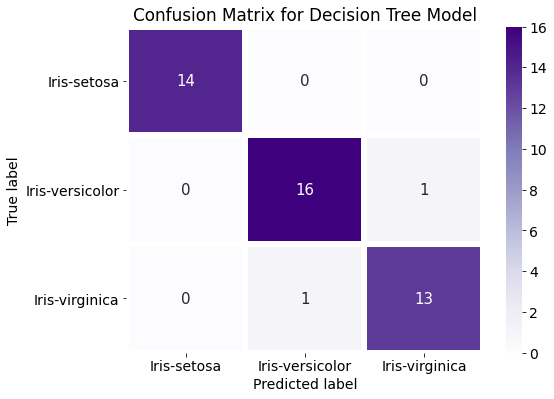

In [38]:
CM(y_test, DT_pred, col_names=col_names, model='Decision Tree')

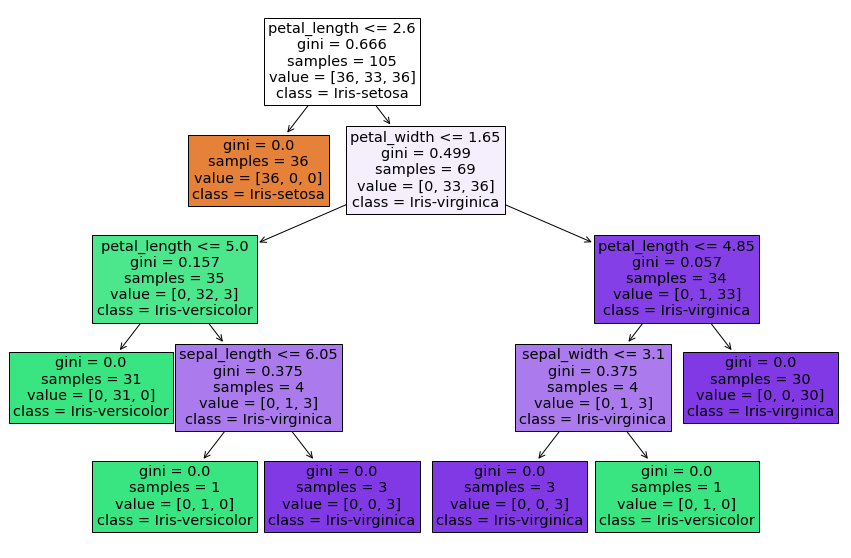

In [39]:
from sklearn import tree

pl.figure(figsize=(15,10))
tree.plot_tree(DT, feature_names=X.columns, class_names=col_names, filled=True)
pl.show()

In [40]:
print(classification_report(y_test, DT_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [41]:
def KNN_n_test(X_train, y_train, X_test, y_test, n_list, fs=(8,6)):
    
    from sklearn import metrics
    from sklearn.metrics import accuracy_score
    
    assert n_list[0] > 0, f'Please make sure n[0] = {n_list[0]} > 0.'

    # looping through different n values
    scores = [0]*len(n_list)
    
    for i, n in enumerate(n_list):
        KNN = KNeighborsClassifier(n_neighbors=n)
        
        KNN.fit(X_train, y_train)
        y_pred = KNN.predict(X_test)
        
        scores[i] = accuracy_score(y_test, y_pred)

    pl.figure(figsize=fs)
    pl.plot(n_list, scores, color='k')
    pl.scatter(n_list, scores, color='C9')
    pl.xlabel('n values for KNN')
    pl.ylabel('Accuracy Score')
    pl.title('Accuracy Scores for K-Nearest Neighbors Vote Models')
    pl.grid(alpha=0.2)
    pl.show()

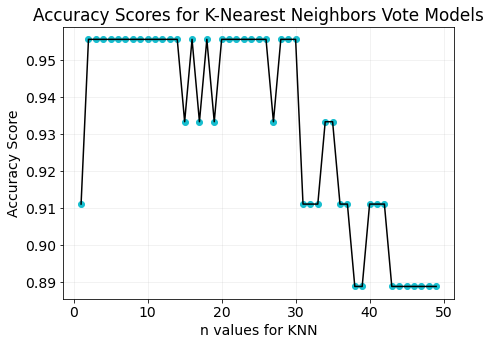

In [42]:
KNN_n_test(X_train_ss, y_train, X_test_ss, y_test, n_list=range(1,50), fs=(7,5))

In [43]:
KNN = KNeighborsClassifier(n_neighbors=10)

# Fitting Model 
KNN.fit(X_train_ss, y_train)

# Getting Predictions
KNN_pred = KNN.predict(X_test_ss)

In [44]:
KNN_ac = accuracy_score(y_test, KNN_pred)
ac_list.append(KNN_ac)
model_names.append('KNN')

print(f'Accuracy Score: {KNN_ac:.3f}\n')

Accuracy Score: 0.956



In [45]:
KNN_pred_df = pd.DataFrame(pd.Series(KNN_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), KNN_pred_df], axis=1)

,species,Test Outcome
Iris-versicolor,17,17
Iris-virginica,14,14
Iris-setosa,14,14


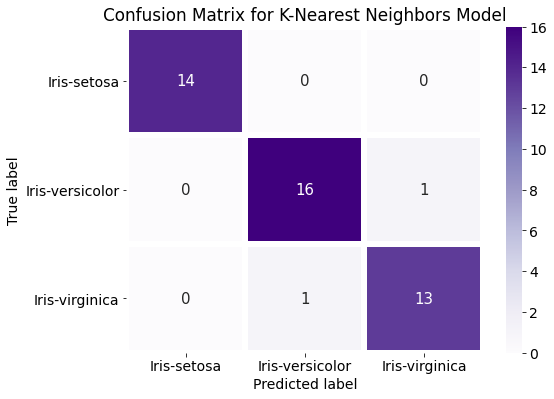

In [46]:
CM(y_test, KNN_pred, col_names=col_names, model='K-Nearest Neighbors')

In [47]:
print(classification_report(y_test, KNN_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [48]:
GN = GaussianNB()

# Fitting Model
GN.fit(X_train, y_train)

# Getting Predictions
GM_pred = GN.predict(X_test)

In [49]:
GM_ac = accuracy_score(y_test, GM_pred)
ac_list.append(GM_ac)
model_names.append('GM')

print(f'Accuracy Score: {GM_ac:.3f}\n')

Accuracy Score: 0.956



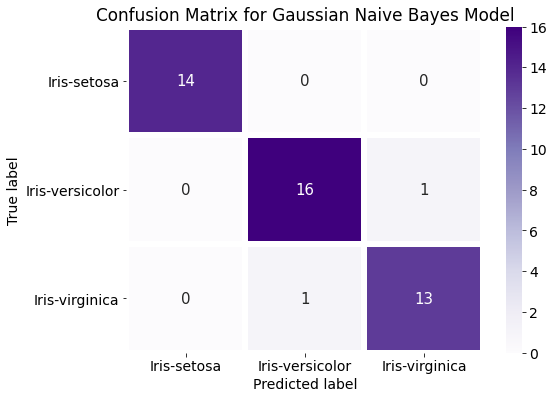

In [50]:
CM(y_test, GM_pred, col_names=col_names, model='Gaussian Naive Bayes')

In [51]:
print(classification_report(y_test, GM_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [52]:
SV = svm.SVC()

# Fitting Model
SV.fit(X_train, y_train)

# Getting Predictions 
SV_pred = SV.predict(X_test)

In [53]:
SV_ac = accuracy_score(y_test, SV_pred)
ac_list.append(SV_ac)
model_names.append('SVC')

print(f'Accuracy Score: {SV_ac:.3f}\n')

Accuracy Score: 0.956



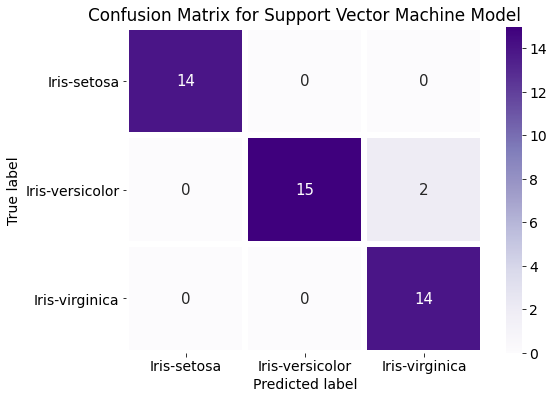

In [54]:
CM(y_test, SV_pred, col_names=col_names, model='Support Vector Machine')

In [55]:
print(classification_report(y_test, SV_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.94        17
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [56]:
model_ac = pd.DataFrame(dict(zip(model_names, ac_list)), index=['model_names']).T
model_ac.rename(columns={'model_names': 'Accuracy'}, inplace=True)
round(model_ac, 2)

,Accuracy
MLR,0.98
DT,0.96
KNN,0.96
GM,0.96
SVC,0.96


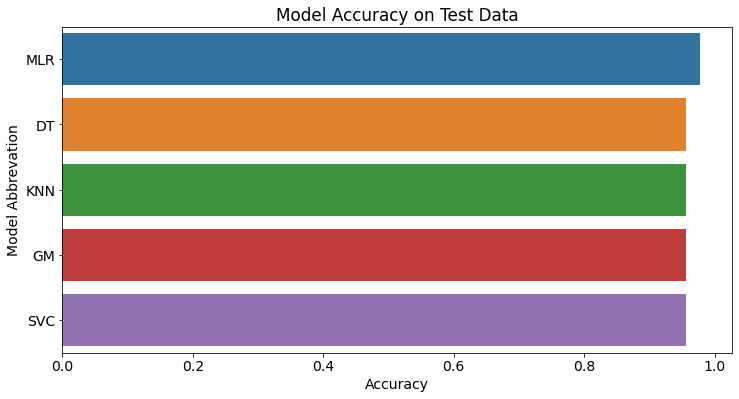

In [58]:
pl.figure(figsize=(12,6))
sns.barplot(x='Accuracy', y=model_ac.index, data=model_ac)
pl.title('Model Accuracy on Test Data')
pl.ylabel('Model Abbrevation')
pl.show()